In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Entrega 10/11 - Dataset lido
Mínimo esperado: um arquivo do jupyter notebook (.ipynb) com o
código que lê o dataset (que também deve ser enviado no git) e realiza limpeza e manipulações necessárias no dataset.

In [2]:
data_og = pd.read_excel("tea.xlsx")
print(data_og.shape)

data = data_og
data = data.drop(labels = "age_Q", axis = 1)
data = pd.get_dummies(data)

print(data.shape)
data.head()

(300, 36)
(300, 57)


,breakfast,afternoon.tea,evening,after.lunch,after.dinner,anytime,home,work,tearoom,friends,...,profession_management,profession_manual labourer,profession_other work,profession_senior management,profession_student,profession_unemployed,frequency_1 to 2/week,frequency_1/day,frequency_3 to 6/week,frequency_more than 2/day
0,False,False,False,False,True,False,True,False,False,False,...,0,0,0,0,1,0,0,1,0,0
1,False,False,False,False,True,False,True,False,False,False,...,0,0,0,0,1,0,0,1,0,0
2,False,False,False,False,False,True,True,False,False,True,...,0,0,0,0,0,1,0,0,0,1
3,False,False,False,False,False,True,True,False,False,False,...,1,0,0,0,0,0,0,0,0,1
4,False,False,False,False,False,True,True,True,True,True,...,1,0,0,0,0,0,0,0,0,1


### Entrega 15/11 - Dataset lido e análise exploratória feita
Mínimo esperado: um arquivo do jupyter notebook (.ipynb) com o
código que lê o dataset (que também deve ser enviado no git) e faz uma análise exploratória inicial.

In [3]:
data = data.astype("category")
data_og = data_og.astype("category")

for col in data_og.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(data_og[col].value_counts())

----------------------------------------breakfast---------------------------------------- - 

False    156
True     144
Name: breakfast, dtype: int64

----------------------------------------afternoon.tea---------------------------------------- - 

True     169
False    131
Name: afternoon.tea, dtype: int64

----------------------------------------evening---------------------------------------- - 

False    197
True     103
Name: evening, dtype: int64

----------------------------------------after.lunch---------------------------------------- - 

False    256
True      44
Name: after.lunch, dtype: int64

----------------------------------------after.dinner---------------------------------------- - 

False    279
True      21
Name: after.dinner, dtype: int64

----------------------------------------anytime---------------------------------------- - 

False    197
True     103
Name: anytime, dtype: int64

----------------------------------------home---------------------------------------- - 

True     291
False      9
Name: home, dtype: int64

----------------------------------------work---------------------------------------- - 

False    213
True      87
Name: work, dtype: int64

----------------------------------------tearoom---------------------------------------- - 

False    242
True      58
Name: tearoom, dtype: int64

----------------------------------------friends---------------------------------------- - 

True     196
False    104
Name: friends, dtype: int64

----------------------------------------restaurant---------------------------------------- - 

False    221
True      79
Name: restaurant, dtype: int64

----------------------------------------pub---------------------------------------- - 

False    237
True      63
Name: pub, dtype: int64

----------------------------------------variety---------------------------------------- - 

1    193
2     74
3     33
Name: variety, dtype: int64

----------------------------------------how---------------------------------------- - 

nothing.added    195
milk              63
lemon             33
other              9
Name: how, dtype: int64

----------------------------------------sugar---------------------------------------- - 

False    155
True     145
Name: sugar, dtype: int64

----------------------------------------format---------------------------------------- - 

sachet          170
sachet+loose     94
loose            36
Name: format, dtype: int64

----------------------------------------place.of.purchase---------------------------------------- - 

supermarket                192
supermarket+specialist.     78
specialist.shop             30
Name: place.of.purchase, dtype: int64

----------------------------------------type---------------------------------------- - 

varies         112
known.brand     95
luxury          53
shop.brand      21
unknown         12
cheapest         7
Name: type, dtype: int64

----------------------------------------sex---------------------------------------- - 

F    178
M    122
Name: sex, dtype: int64

----------------------------------------profession---------------------------------------- - 

student              70
unemployed           64
employee             59
management           40
senior management    35
other work           20
manual labourer      12
Name: profession, dtype: int64

----------------------------------------sport---------------------------------------- - 

True     179
False    121
Name: sport, dtype: int64

----------------------------------------age---------------------------------------- - 

21    20
22    18
25    16
20    12
23    12
      ..
68     1
62     1
89     1
43     1
90     1
Name: age, Length: 61, dtype: int64

----------------------------------------age_Q---------------------------------------- - 

15-24       92
25-34       69
45-59       61
35-44       40
60 and +    38
Name: age_Q, dtype: int64

----------------------------------------frequency---------------------------------------- - 

more than 2/day    127
1/day               95
1 to 2/week         44
3 to 6/week         34
Name: frequency, dtype: int64

----------------------------------------exotic---------------------------------------- - 

False    158
True     142
Name: exotic, dtype: int64

----------------------------------------spirituality---------------------------------------- - 

False    206
True      94
Name: spirituality, dtype: int64

----------------------------------------good for health---------------------------------------- - 

True     210
False     90
Name: good for health, dtype: int64

----------------------------------------diuretic---------------------------------------- - 

True     174
False    126
Name: diuretic, dtype: int64

----------------------------------------friendliness---------------------------------------- - 

True     242
False     58
Name: friendliness, dtype: int64

----------------------------------------iron absorption---------------------------------------- - 

False    269
True      31
Name: iron absorption, dtype: int64

----------------------------------------feminine---------------------------------------- - 

False    171
True     129
Name: feminine, dtype: int64

----------------------------------------refined---------------------------------------- - 

True     215
False     85
Name: refined, dtype: int64

----------------------------------------slimming---------------------------------------- - 

False    255
True      45
Name: slimming, dtype: int64

----------------------------------------stimulant---------------------------------------- - 

False    184
True     116
Name: stimulant, dtype: int64

----------------------------------------relaxant---------------------------------------- - 

True     187
False    113
Name: relaxant, dtype: int64

----------------------------------------no.effect.health---------------------------------------- - 

True     234
False     66
Name: no.effect.health, dtype: int64

A variável target escolhida é "Variety" para descobrir qual é a preferência de tipo de chá consumido. As outras vão ser consideradas features. <br>
Legenda: <br>
<li> 1 - Flavoured;
<li> 2 - Black;
<li> 3 - Green.

In [4]:
pd.crosstab(data_og["variety"], data_og["age_Q"])

age_Q,15-24,25-34,35-44,45-59,60 and +
variety,,,,,
1,77,48,21,34,13
2,11,11,16,18,18
3,4,10,3,9,7


In [5]:
pd.crosstab(data_og["variety"], data_og["profession"])

profession,employee,management,manual labourer,other work,senior management,student,unemployed
variety,,,,,,,
1,38,23,9,11,22,58,32
2,15,13,1,5,9,9,22
3,6,4,2,4,4,3,10


In [6]:
pd.crosstab(data_og["variety"], data_og["good for health"])

good for health,False,True
variety,,
1,64,129
2,20,54
3,6,27


In [7]:
pd.crosstab(data_og["variety"], data_og["how"])

how,lemon,milk,nothing.added,other
variety,,,,
1,24,38,128,3
2,7,19,42,6
3,2,6,25,0


### Preparação dos dados
Usando numpy, é possível separar o target dos features e simplificar o processo do algoritmo de machine learning escolhido.

In [8]:
target = np.array(data["variety"])

features = data.drop("variety", axis = 1)

feature_list = list(features.columns)

features = np.array(features)

### Separando dos dados em treinamento e teste

In [9]:
trn_features, tst_features, trn_target, tst_target = train_test_split(features, target, test_size = 0.25)

### Treinando o 1° modelo
O primeiro modelo escolhido é o Random Forest

In [10]:
# O modelo vai ser iniciado com 1000 árvores
rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(trn_features, trn_target);

### Testando o 1° modelo

In [11]:
# Probabilidade das previsões do modelo
predictions_prob_rf = rf.predict_proba(tst_features)
predictions_rf = rf.predict(tst_features)

error_rf = 1 - rf.score(tst_features, tst_target, sample_weight=None)

# Erro total de classificação
print('Prediction prob:',round(np.mean(predictions_prob_rf),4)*100, "%")
print('Mean Absolute Error:', round(error_rf,4)*100, "%")

# Matriz de confusão
pd.crosstab(tst_target, predictions_rf, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Prediction prob: 33.33 %
Mean Absolute Error: 32.0 %


Predicted Preference,1,2,3
Actual Preference,,,
1,48,1,0
2,18,3,1
3,2,2,0


### Treinando o 2° modelo
O segundo modelo escolhido é Boosting, continuando a usar árvores de decisão.

In [12]:
AdaBoost = AdaBoostClassifier(n_estimators = 1000, learning_rate = 1, algorithm = 'SAMME')

AdaBoost.fit(trn_features, trn_target)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1,
                   n_estimators=1000, random_state=None)

### Testando o 2° modelo

In [13]:
error_boost = 1-AdaBoost.score(tst_features, tst_target)

print("Erro de classificação: ", error_boost*100, "%")

# Matriz de Confusão
predictions_boost = AdaBoost.predict(tst_features)

pd.crosstab(tst_target, predictions_boost, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Erro de classificação:  41.333333333333336 %


Predicted Preference,1,2,3
Actual Preference,,,
1,37,9,3
2,12,7,3
3,2,2,0


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(trn_features, trn_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
pd.DataFrame(data = {"importance": clf.feature_importances_, "features": feature_list})

,importance,features
0,0.000000,breakfast
1,0.008541,afternoon.tea
2,0.000000,evening
3,0.000000,after.lunch
4,0.011388,after.dinner
5,0.018704,anytime
6,0.000000,home
7,0.036261,work
8,0.000000,tearoom
9,0.032265,friends


In [16]:
clf.score(tst_features, tst_target)
pd.Series(clf.feature_importances_).sort_values(ascending = False)

14    0.246318
28    0.040995
18    0.039959
7     0.036261
26    0.035302
45    0.034897
49    0.034267
9     0.032265
17    0.032028
34    0.029795
12    0.029714
52    0.028497
21    0.027758
35    0.027342
51    0.022965
10    0.022776
25    0.019929
55    0.019359
5     0.018704
20    0.017918
48    0.017592
38    0.017474
32    0.017206
44    0.016195
46    0.016065
30    0.013665
19    0.013646
41    0.012811
24    0.012811
23    0.012638
40    0.012354
36    0.011388
4     0.011388
1     0.008541
39    0.005037
16    0.004141
6     0.000000
3     0.000000
11    0.000000
2     0.000000
8     0.000000
13    0.000000
27    0.000000
15    0.000000
22    0.000000
54    0.000000
29    0.000000
31    0.000000
33    0.000000
37    0.000000
42    0.000000
43    0.000000
47    0.000000
50    0.000000
53    0.000000
0     0.000000
dtype: float64

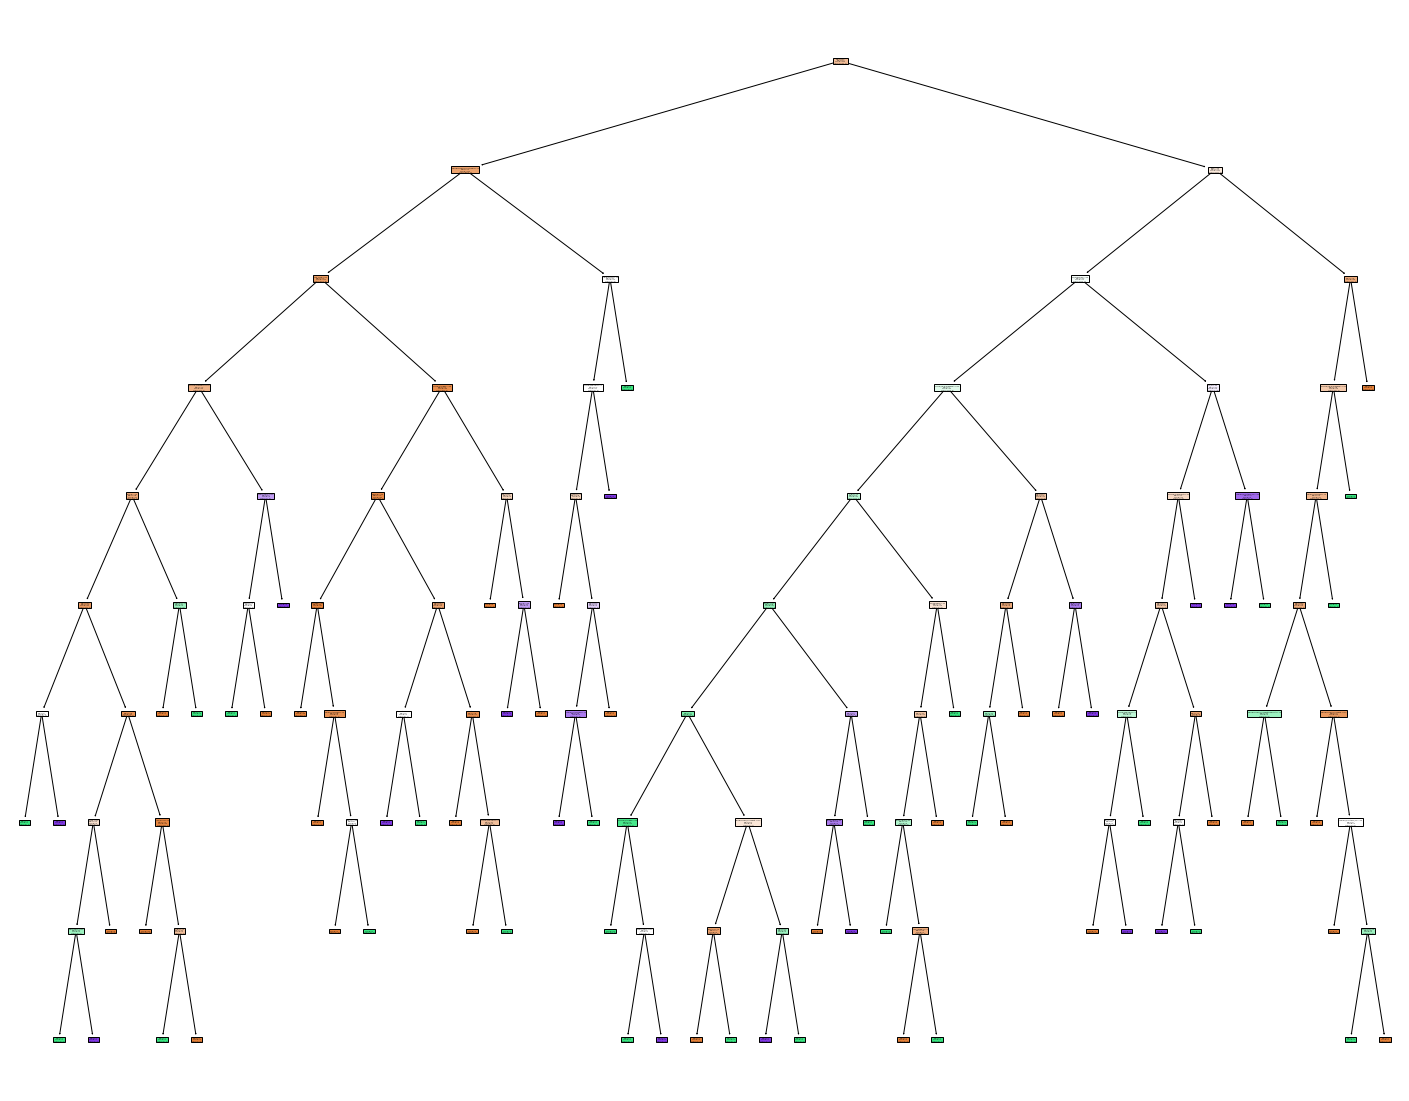

In [17]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_list,  
                   filled=True)


In [18]:
data2=data.drop(columns=[
'profession_other work',
'stimulant',
'profession_student',
'spirituality',
'sex_M',
'frequency_1/day',
'evening',
'frequency_1 to 2/week',
'profession_unemployed',
'work',
'profession_manual labourer',
'profession_management',
'restaurant',
'type_unknown',
'how_milk',
'sport',
'type_shop.brand',
'type_known.brand',
'type_cheapest',
'diuretic',
'place.of.purchase_supermarket',
'iron absorption',
'format_sachet+loose',
'how_nothing.added',
'frequency_more than 2/day',
'home',
'feminine',
'type_varies',
'place.of.purchase_specialist.shop',
'format_sachet+loose',
'type_luxury',
'profession_student',
'sex_M',
'format_loose',
'profession_unemployed',
'relaxant',
'sex_F',
'profession_senior management',
'evening',
'frequency_1 to 2/week'])

### Preparando os novos dados

In [19]:
target2 = np.array(data2["variety"])

features2 = data2.drop("variety", axis = 1)

feature_list2 = list(features2.columns)

features2 = np.array(features2)

### Separando dos dados em treinamento e teste

In [20]:
trn_features2, tst_features2, trn_target2, tst_target2 = train_test_split(features2, target2, test_size = 0.25)

### Treinando o 1° modelo
O primeiro modelo escolhido é o Random Forest

In [21]:
# O modelo vai ser iniciado com 1000 árvores
rf2 = RandomForestClassifier(n_estimators = 1000, max_depth = 5)

rf2.fit(trn_features2, trn_target2);

### Testando o 1° modelo

In [22]:
# Probabilidade das previsões do modelo
predictions_prob_rf2 = rf2.predict_proba(tst_features2)
predictions_rf2 = rf2.predict(tst_features2)

error_rf2 = 1 - rf2.score(tst_features2, tst_target2, sample_weight=None)

# Erro total de classificação
print('Prediction prob:',round(np.mean(predictions_prob_rf2),4)*100, "%")
print('Mean Absolute Error:', round(error_rf2,4)*100, "%")

# Matriz de confusão
pd.crosstab(tst_target2, predictions_rf2, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Prediction prob: 33.33 %
Mean Absolute Error: 34.67 %


Predicted Preference,1,2,3
Actual Preference,,,
1,49,1,0
2,21,0,1
3,2,1,0


### Treinando o 2° modelo
O segundo modelo escolhido é Boosting, continuando a usar árvores de decisão.

In [23]:
AdaBoost2 = AdaBoostClassifier(n_estimators = 1000, learning_rate = 1, algorithm = 'SAMME')

AdaBoost2.fit(trn_features2, trn_target2)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1,
                   n_estimators=1000, random_state=None)

### Testando o 2° modelo

In [24]:
error_boost2 = 1-AdaBoost2.score(tst_features2, tst_target2)

print("Erro de classificação: ", error_boost*100, "%")

# Matriz de Confusão
predictions_boost2 = AdaBoost2.predict(tst_features2)

pd.crosstab(tst_target2, predictions_boost2, rownames=['Actual Preference'], colnames=['Predicted Preference'])

Erro de classificação:  41.333333333333336 %


Predicted Preference,1,2,3
Actual Preference,,,
1,36,7,7
2,12,6,4
3,0,2,1


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0, max_depth=5)

clf2.fit(trn_features2, trn_target2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [26]:
pd.DataFrame(data = {"importance": clf2.feature_importances_, "features": feature_list2})

,importance,features
0,0.010650,breakfast
1,0.084674,afternoon.tea
2,0.000000,after.lunch
3,0.059952,after.dinner
4,0.000000,anytime
5,0.026520,tearoom
6,0.000000,friends
7,0.062075,pub
8,0.036138,sugar
9,0.400388,age


In [27]:
clf2.score(tst_features2, tst_target2)
pd.Series(clf2.feature_importances_).sort_values(ascending = False)

9     0.400388
1     0.084674
12    0.068540
7     0.062075
3     0.059952
18    0.059015
19    0.056096
14    0.054830
11    0.041658
10    0.039464
8     0.036138
5     0.026520
0     0.010650
20    0.000000
13    0.000000
6     0.000000
15    0.000000
4     0.000000
16    0.000000
2     0.000000
17    0.000000
21    0.000000
dtype: float64

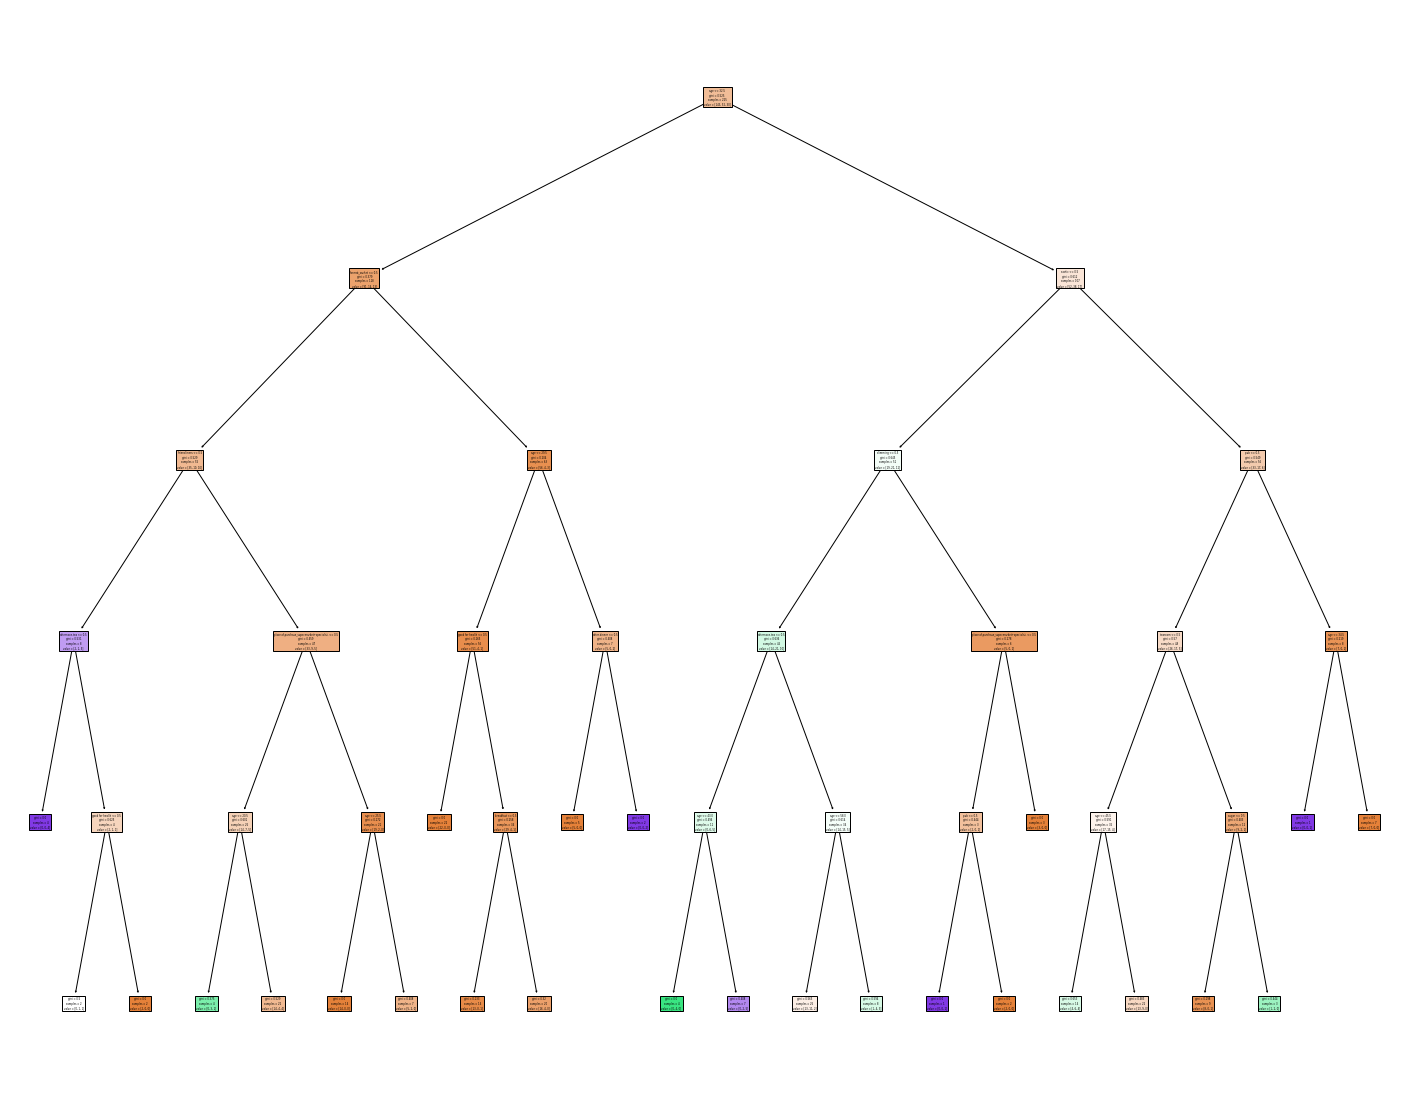

In [28]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2, 
                   feature_names=feature_list2,  
                   filled=True)


### Referências: <br>
<li> https://blog.softhints.com/pandas-value_counts-multiple-columns/
<li> https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
<li> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
<li> https://pandas.pydata.org/pandas-docs/stable/index.html
<li> https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
<li> https://www.python-course.eu/Boosting.php
<li> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html